In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
!pwd

/Users/chelmo/Desktop/UCSDSAN2019DATA1/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions


In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
results = session.query(Measurement).first()
results

In [12]:
annual_precip = engine.execute(''' SELECT *
FROM measurement
''').fetchall()

annual_precip

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [13]:
precip_station = engine.execute(''' SELECT *
FROM station
''').fetchall()

precip_station

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# 8/23/17


# Perform a query to retrieve the data and precipitation scores
annual_precip = engine.execute(''' SELECT *
FROM measurement
WHERE date >= 20160823
''').fetchall()

annual_precip

[(2495, 'USC00519397', '2017-01-01', 0.0, 62.0),
 (2496, 'USC00519397', '2017-01-02', 0.0, 66.0),
 (2497, 'USC00519397', '2017-01-03', 0.0, 63.0),
 (2498, 'USC00519397', '2017-01-04', 0.0, 62.0),
 (2499, 'USC00519397', '2017-01-05', 0.0, 63.0),
 (2500, 'USC00519397', '2017-01-06', 0.0, 64.0),
 (2501, 'USC00519397', '2017-01-07', 0.0, 66.0),
 (2502, 'USC00519397', '2017-01-08', 0.0, 60.0),
 (2503, 'USC00519397', '2017-01-09', 0.0, 64.0),
 (2504, 'USC00519397', '2017-01-10', 0.0, 63.0),
 (2505, 'USC00519397', '2017-01-11', 0.0, 78.0),
 (2506, 'USC00519397', '2017-01-12', 0.0, 67.0),
 (2507, 'USC00519397', '2017-01-13', 0.0, 67.0),
 (2508, 'USC00519397', '2017-01-14', 0.0, 65.0),
 (2509, 'USC00519397', '2017-01-15', 0.0, 66.0),
 (2510, 'USC00519397', '2017-01-16', 0.0, 67.0),
 (2511, 'USC00519397', '2017-01-17', 0.0, 66.0),
 (2512, 'USC00519397', '2017-01-18', 0.0, 72.0),
 (2513, 'USC00519397', '2017-01-19', 0.0, 73.0),
 (2514, 'USC00519397', '2017-01-20', 0.0, 71.0),
 (2515, 'USC00519397

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(annual_precip)
precip_df.head()

,0,1,2,3,4
0,2495,USC00519397,2017-01-01,0.0,62.0
1,2496,USC00519397,2017-01-02,0.0,66.0
2,2497,USC00519397,2017-01-03,0.0,63.0
3,2498,USC00519397,2017-01-04,0.0,62.0
4,2499,USC00519397,2017-01-05,0.0,63.0


In [26]:
precip_df = precip_df.rename(columns={0: 'Nothing', 1: 'Station', 2: 'Date', 3: 'Precip', 4:"Temp"})
precip_df.head()

,Nothing,Station,Date,Precip,Temp
0,2495,USC00519397,2017-01-01,0.0,62.0
1,2496,USC00519397,2017-01-02,0.0,66.0
2,2497,USC00519397,2017-01-03,0.0,63.0
3,2498,USC00519397,2017-01-04,0.0,62.0
4,2499,USC00519397,2017-01-05,0.0,63.0


In [27]:
date_df = precip_df[['Date', 'Station','Precip']]
date_df.head()

,Date,Station,Precip
0,2017-01-01,USC00519397,0.0
1,2017-01-02,USC00519397,0.0
2,2017-01-03,USC00519397,0.0
3,2017-01-04,USC00519397,0.0
4,2017-01-05,USC00519397,0.0


In [28]:
date_df = date_df.set_index('Date')
date_df.head()

,Station,Precip
Date,,
2017-01-01,USC00519397,0.0
2017-01-02,USC00519397,0.0
2017-01-03,USC00519397,0.0
2017-01-04,USC00519397,0.0
2017-01-05,USC00519397,0.0


In [29]:
# Sort the dataframe by date
date_df.sort_values(by='Date')
date_df.head()


,Station,Precip
Date,,
2017-01-01,USC00519397,0.0
2017-01-02,USC00519397,0.0
2017-01-03,USC00519397,0.0
2017-01-04,USC00519397,0.0
2017-01-05,USC00519397,0.0


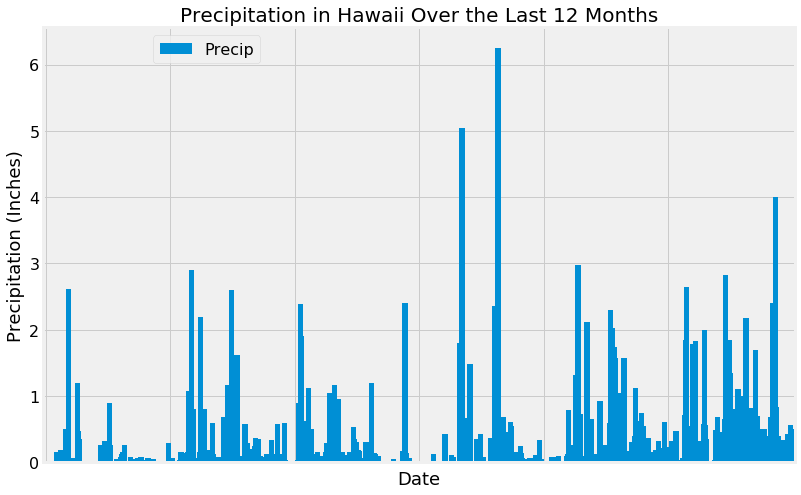

In [30]:
# Plot the precipitation for the past 12 months
ax = date_df.plot(kind='bar', width=10, figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation in Hawaii Over the Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.savefig("../Precipitation.png")
plt.show()

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_df.describe()

,Precip
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


In [32]:
# Design a query to show how many stations are available in this dataset?
station_num = engine.execute(''' SELECT DISTINCT count(station)
FROM station
''').fetchall()

station_num


[(9,)]

In [33]:
station_list = engine.execute(''' SELECT station
FROM station
GROUP BY station
''').fetchall()

station_list

[('USC00511918',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00516128',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519281',),
 ('USC00519397',),
 ('USC00519523',)]

In [34]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = engine.execute(''' SELECT station, COUNT(station)
FROM measurement
GROUP BY station
ORDER BY count(station) DESC
''').fetchall()

active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_stats = engine.execute(''' SELECT station, min(tobs), max(tobs), avg(tobs)
FROM measurement
WHERE station = 'USC00519281'
''').fetchall()

station_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
annual_observs = engine.execute(''' SELECT tobs
FROM measurement
WHERE date >= 20160823
''').fetchall()

annual_observs


[(62.0,),
 (66.0,),
 (63.0,),
 (62.0,),
 (63.0,),
 (64.0,),
 (66.0,),
 (60.0,),
 (64.0,),
 (63.0,),
 (78.0,),
 (67.0,),
 (67.0,),
 (65.0,),
 (66.0,),
 (67.0,),
 (66.0,),
 (72.0,),
 (73.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (72.0,),
 (69.0,),
 (72.0,),
 (71.0,),
 (65.0,),
 (64.0,),
 (67.0,),
 (67.0,),
 (68.0,),
 (70.0,),
 (61.0,),
 (65.0,),
 (72.0,),
 (73.0,),
 (76.0,),
 (64.0,),
 (62.0,),
 (61.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (71.0,),
 (68.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (72.0,),
 (74.0,),
 (70.0,),
 (64.0,),
 (65.0,),
 (72.0,),
 (74.0,),
 (66.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (71.0,),
 (72.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (70.0,),
 (72.0,),
 (69.0,),
 (73.0,),
 (75.0,),
 (75.0,),
 (74.0,),
 (70.0,),
 (73.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (72.0,),
 (75.0,),


In [37]:
# Save the query results as a Pandas DataFrame and set the index to the date column
histogram_df = pd.DataFrame(annual_observs)
histogram_df.head()

,0
0,62.0
1,66.0
2,63.0
3,62.0
4,63.0


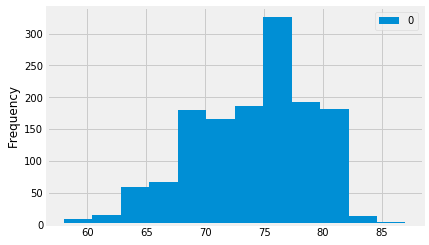

In [41]:
histogram_df.plot.hist(bins=12, label='tobs')
plt.ylabel = 'Observation Frequency'
plt.xlabel = 'tobs'
# plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
# plt.legend(tobs)
plt.savefig("../tobs.png")
plt.show()

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def my_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
my_trip = my_temps('2017-02-28', '2017-03-05')
print(my_temps('2017-02-28', '2017-03-05'))


[(64.0, 72.02777777777777, 78.0)]


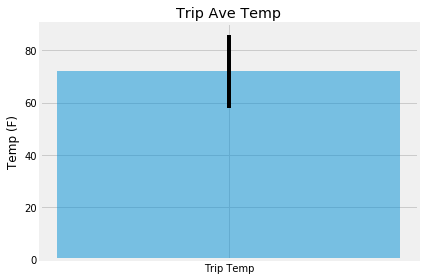

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Build the plot
fig, ax = plt.subplots()
ax.bar('Trip Temp', 72.02777777777777, yerr=14.0, alpha=0.5)
ax.set_ylabel('Temp (F)')
ax.set_title('Trip Ave Temp')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()


In [34]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
### WHAT IS GOING ON HERE????? ###

my_rain = engine.execute(''' SELECT s.station, SUM(m.prcp), s.name, s.latitude, s.longitude, s.elevation
FROM measurement m
INNER JOIN station s ON s.station = m.station
WHERE m.date BETWEEN '2017-02-28' AND '2017-03-05'
GROUP BY s.station
ORDER BY SUM(m.prcp) DESC
''').fetchall()

rain_df = pd.DataFrame(my_rain)
rain_df

,0,1,2,3,4,5
0,USC00519281,4.72,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,USC00513117,4.45,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00516128,4.07,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
3,USC00517948,2.98,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00519397,2.74,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
5,USC00519523,2.32,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00514830,1.16,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
